In [1]:
import numpy as np
phases = np.random.rand(2**3)
diag = np.exp(1j * phases)
phases

array([0.69878433, 0.54670788, 0.97866499, 0.48623312, 0.02386728,
       0.39320866, 0.29477574, 0.8630937 ])

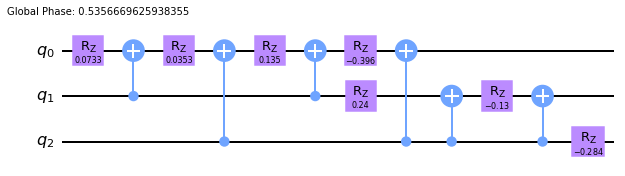

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import Diagonal

circ = QuantumCircuit(3)
circ.append(Diagonal(diag), circ.qubits)
circ.decompose(reps=4).draw("mpl")

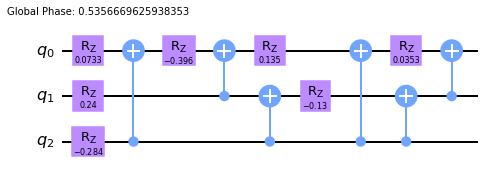

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew

circ = QuantumCircuit(3)
circ.append(DiagonalNew(diag), circ.qubits)
circ.decompose(reps=2).draw("mpl")

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew
from qiskit.circuit import ParameterVector

beta = ParameterVector("beta", 4)
beta = [beta[0], beta[1], beta[2], beta[3]]

circ = QuantumCircuit(4)
circ.append(DiagonalNew(diag), circ.qubits)
circ.decompose(reps=2).draw("mpl")

NameError: name 'diag' is not defined

In [1]:
from qiskit.quantum_info import Statevector, Operator
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew
import numpy as np

testdata = (
    [0, 0],
    [0, 0.8],
    [0, 0, 1, 1],
    [0, 1, 0.5, 1],
    (2 * np.pi * np.random.rand(2**3)),
    (2 * np.pi * np.random.rand(2**4)),
    (2 * np.pi * np.random.rand(2**5)),
)
def test_diag_gate(phases):
    """Test correctness of diagonal decomposition."""
    diag = [np.exp(1j * ph) for ph in phases]
    qc = DiagonalNew(diag)
    simulated_diag = Statevector(Operator(qc).data.diagonal()).data
    ref_diag = Statevector(diag).data
    print(simulated_diag)
    print(ref_diag)

    assert matrix_equal(simulated_diag, ref_diag, ignore_phase=False)

for test in testdata:
    print("test:", test)
    test_diag_gate(test)

test: [0, 0]
[1.+0.j 1.+0.j]
[1.+0.j 1.+0.j]
test: [0, 0.8]
[1.        +0.j         0.69670671+0.71735609j]
[1.        +0.j         0.69670671+0.71735609j]
test: [0, 0, 1, 1]
[1.        +0.j         1.        +0.j         0.54030231+0.84147098j
 0.54030231+0.84147098j]
[1.        +0.j         1.        +0.j         0.54030231+0.84147098j
 0.54030231+0.84147098j]
test: [0, 1, 0.5, 1]
[1.        +1.11022302e-16j 0.54030231+8.41470985e-01j
 0.87758256+4.79425539e-01j 0.54030231+8.41470985e-01j]
[1.        +0.j         0.54030231+0.84147098j 0.87758256+0.47942554j
 0.54030231+0.84147098j]
test: [5.58920627 1.57101603 4.58648854 0.45310298 0.64794436 5.32287893
 3.54009408 2.74513657]
[ 7.68707114e-01-0.63960095j -2.19699596e-04+0.99999998j
 -1.25568101e-01-0.992085j    8.99093082e-01+0.4377575j
  7.97326163e-01+0.60354866j  5.73268977e-01-0.81936724j
 -9.21643530e-01-0.38803763j -9.22435274e-01+0.38615174j]
[ 7.68707114e-01-0.63960095j -2.19699596e-04+0.99999998j
 -1.25568101e-01-0.992085j

In [8]:
import cmath
import numpy as np
phases = np.random.rand(2**nq)
diag = np.exp(1j * phases)
print(phases)
diag_phases = [cmath.phase(z) for z in diag]
diag_phases

[0.25497877 0.74669503 0.67378302 0.30046649 0.11570287 0.66515132
 0.95985291 0.6733359  0.31466514 0.46073762 0.18053173 0.60476063
 0.63925843 0.90467679 0.59443788 0.93173947]


[0.25497877198329266,
 0.746695025483916,
 0.6737830176498846,
 0.3004664883223842,
 0.11570287409876744,
 0.6651513193612915,
 0.959852909356385,
 0.6733358979875009,
 0.314665137553116,
 0.4607376195939725,
 0.1805317324158383,
 0.6047606292987483,
 0.63925843036945,
 0.9046767894651818,
 0.5944378776450308,
 0.9317394685179224]

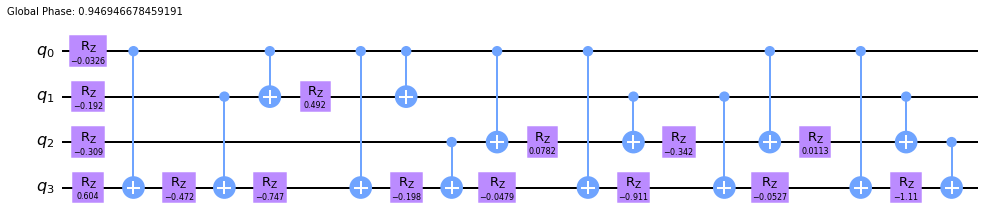

In [2]:
from qiskit.circuit.library import Diagonal
from qiskit.circuit.library.generalized_gates.diagonal_new import DiagonalNew

import numpy as np
from qiskit import QuantumCircuit
nq = 4
diag = np.exp(1j * np.random.rand(2**nq))

circ = QuantumCircuit(nq)
circ.append(Diagonal(diag), circ.qubits)
circ.decompose(reps=4).draw("mpl", filename="diagonal.png")

circ = QuantumCircuit(nq)
circ.append(DiagonalNew(diag), circ.qubits)
circ.decompose(reps=2).draw("mpl", filename="diagonal_new.png")